In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")
    
from src.utils import *
from src.plots import *

# Video model

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embs = torch.load('../embeddings/video/raw.pt')

In [3]:
train_loader, test_loader = train_test_dataloader(embs)

In [4]:
model = MLP(input_dim = 512, hidden_dims = [256], output_dim = 6).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
num_epochs = 50

PARAMS = {'model': model,
          'criterion': criterion,
          'optimizer': optimizer,
          'num_epochs': num_epochs,
          'train_loader': train_loader,
          'test_loader': test_loader,
          'device': DEVICE,
          'patience': 10}

/home/mweuro/venvy/best_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
results  = train_model(**PARAMS)

Epoch 5/50
Train Loss: 1.3416,                    Train Accuracy: 0.4437,                    Train Precision: 0.4334,                    Train Recall 0.4437.
Val Loss: 1.3306,                    Val Accuracy: 0.4124,                    Val Precision: 0.4763,                    Val Recall: 0.4124.
--------------------------------------------------


Epoch 10/50
Train Loss: 1.2064,                    Train Accuracy: 0.5045,                    Train Precision: 0.4981,                    Train Recall 0.5045.
Val Loss: 1.2649,                    Val Accuracy: 0.4815,                    Val Precision: 0.4743,                    Val Recall: 0.4815.
--------------------------------------------------


Epoch 15/50
Train Loss: 1.1226,                    Train Accuracy: 0.5375,                    Train Precision: 0.5347,                    Train Recall 0.5375.
Val Loss: 1.0576,                    Val Accuracy: 0.5910,                    Val Precision: 0.5863,                    Val Recall: 0.5910.
--------------------------------------------------


Epoch 20/50
Train Loss: 1.0571,                    Train Accuracy: 0.5707,                    Train Precision: 0.5669,                    Train Recall 0.5707.
Val Loss: 1.0057,                    Val Accuracy: 0.6031,                    Val Precision: 0.6053,                    Val Recall: 0.6031.
--------------------------------------------------


Epoch 25/50
Train Loss: 1.0419,                    Train Accuracy: 0.5749,                    Train Precision: 0.5738,                    Train Recall 0.5749.
Val Loss: 0.9950,                    Val Accuracy: 0.6118,                    Val Precision: 0.6497,                    Val Recall: 0.6118.
--------------------------------------------------


Epoch 30/50
Train Loss: 1.0040,                    Train Accuracy: 0.5870,                    Train Precision: 0.5872,                    Train Recall 0.5870.
Val Loss: 0.9802,                    Val Accuracy: 0.5917,                    Val Precision: 0.5862,                    Val Recall: 0.5917.
--------------------------------------------------


Epoch 35/50
Train Loss: 1.0095,                    Train Accuracy: 0.5842,                    Train Precision: 0.5840,                    Train Recall 0.5842.
Val Loss: 0.9427,                    Val Accuracy: 0.6320,                    Val Precision: 0.6310,                    Val Recall: 0.6320.
--------------------------------------------------


Epoch 40/50
Train Loss: 0.9684,                    Train Accuracy: 0.6048,                    Train Precision: 0.6053,                    Train Recall 0.6048.
Val Loss: 0.9576,                    Val Accuracy: 0.6212,                    Val Precision: 0.6595,                    Val Recall: 0.6212.
--------------------------------------------------
BEST EPOCH: 28.00          BEST ACCURACY: 0.63          BEST PRECISION: 0.65          BEST RECALL: 0.63


In [6]:
epochs, train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs, best_epoch, cm = results

In [7]:
print(f'BEST LOSS: {val_losses[best_epoch]}')

BEST LOSS: 0.94688801427576


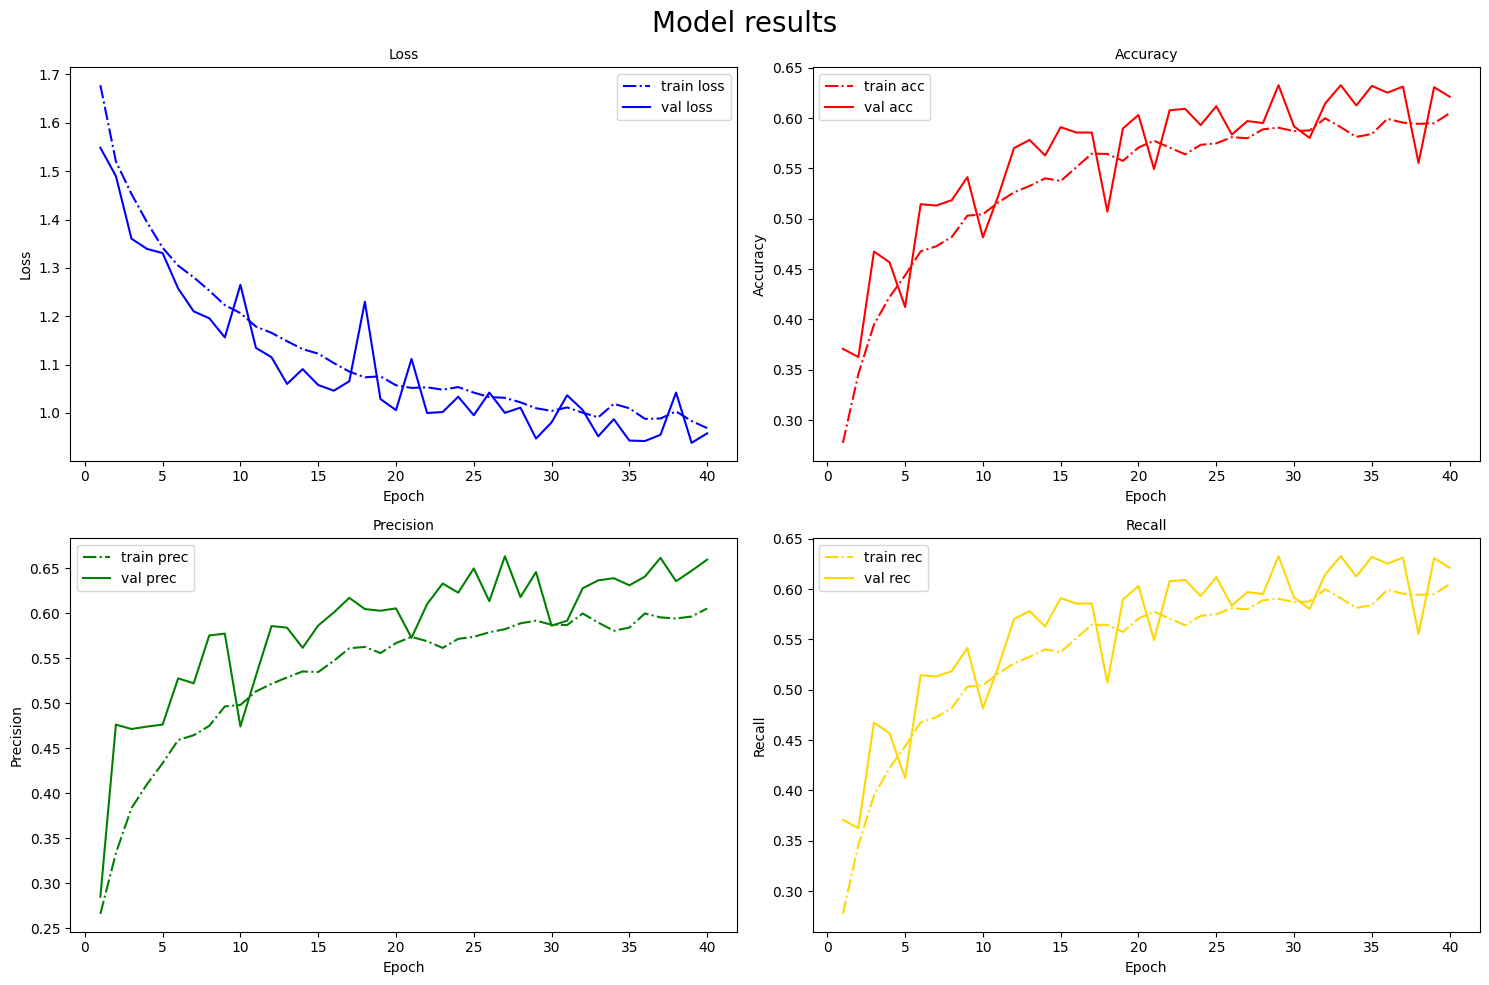

In [8]:
plot_metrics(train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs)

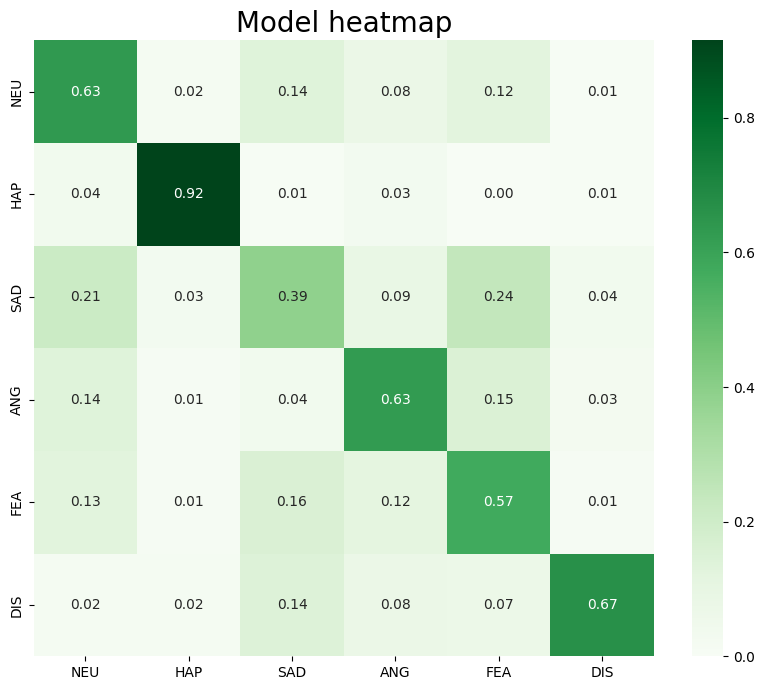

In [9]:
plot_confusion_matrix(cm)